In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

<h3>Extract Useful Data from the Log files</h3>
<p>The below cell have a function to exract the timestamp, packet injection rate, No. of flows in flow table and No. of connections between switch and controller.</p>

In [2]:
def extract_data(log1, log2):
    # Create a dictionary to store flow information
    dataset = []

    # Iterate through the dataset
    for index1, row1 in log2.iterrows():
        time = index1 + 1
        flows = row1['flows']

        packet_rate = 0
        com_count = 0

        for index2, row2 in log1[log1['timestamp'] >= time - 1].iterrows():
            if row2['timestamp'] <= time:
                packet_rate += 1

                if not row2['flowkey'] in row1['flowkeys']:
                    com_count += 1

            else:
                break

        dataset.append((time, packet_rate, flows, com_count))


    # Output csv file
    # Convert dictionary to dataframe
    data = pd.DataFrame(dataset, columns=['time', 'packet_rate', 'flows', 'communications'])

    return data

<h3>Run Extract_Data Function</h3>
<p>The below cell loads the two log files, log_packets.csv and log flowtable.csv then run the extract_data function on these files and save the extracted data to a new file SDN_analysis.csv.</p>

In [4]:
file1 = files.upload()

Saving log_packet_rate.csv to log_packet_rate.csv


In [5]:
file2 = files.upload()

Saving log_flow_table.csv to log_flow_table.csv


In [6]:
log1 = pd.read_csv('log_packet_rate.csv')
log2 = pd.read_csv('log_flow_table.csv')

data = extract_data(log1, log2)

# Save dataframe as a csv file without index
data.to_csv('SDN_analysis.csv', index=False)
print(data)

Empty DataFrame
Columns: [time, packet_rate, flows, communications]
Index: []


In [8]:
file3 = files.upload()

Saving SDN_analysis.csv to SDN_analysis (1).csv


In [9]:
# Load SDN_analysis.csv file to plot the required graphs
data = pd.read_csv('SDN_analysis.csv')

<p>The below cell draw a graph between Packet Injection Rate and Flowtable Occupancy (No. of Flows available in flow table)</p>

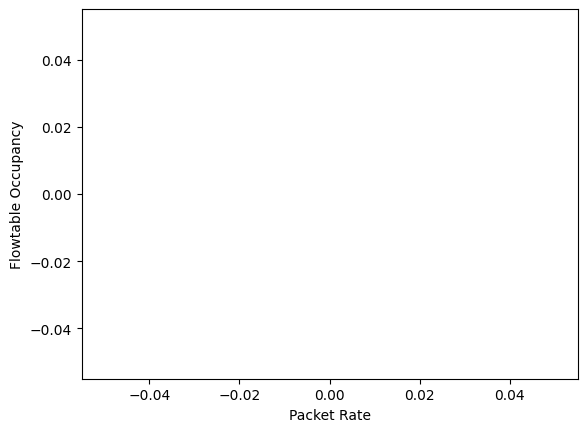

In [10]:
fg, ax = plt.subplots()
ax.set_xlabel('Packet Rate')
ax.set_ylabel('Flowtable Occupancy')

ax.plot(data.packet_rate, data.flows, marker = '', color='r')

<p>The below cell draw a graph between Packet Injection Rate and Delay/ No. of communications (Communication between switch and controller if no flow found in flow table during packet injection)</p>

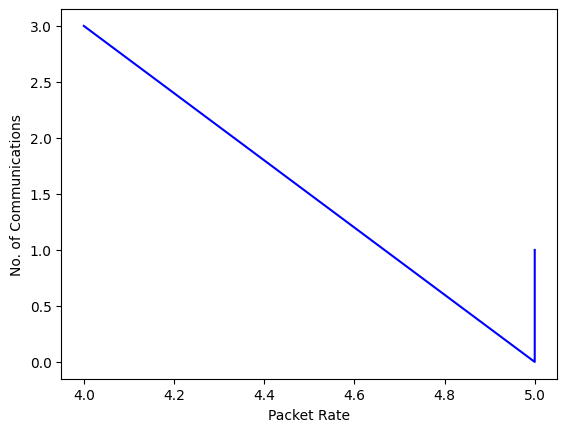

In [ ]:
fg, ax = plt.subplots()
ax.set_xlabel('Packet Rate')
ax.set_ylabel('No. of Communications')

ax.plot(data.packet_rate, data.communications, marker = '', color='b')